#Supoort Vector Regression (SVR)

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


##Creating the matrix of features

In [4]:
X = dataset.iloc[:, 1:-1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


##Creating the dependent variable vector

In [6]:
y = dataset.iloc[:, -1].values

In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


##Transforming the dependent variable vector into a 2D array

In [8]:
y = y.reshape(len(y), 1)

In [9]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


##Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

###Feature scaling on matrix of features

In [11]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [12]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


###Feature scaling on dependent variable vector

In [13]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##Building the SVR model

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

##Training the SVR model

In [16]:
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##Making a single prediction

In [17]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)))

[[170370.0204065]]


##Visualizing the results

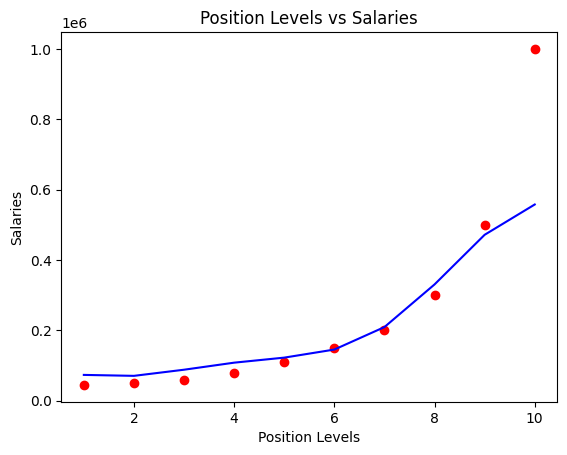

In [18]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Position Levels vs Salaries')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show()